# Dynamic Programming and Structural Econometrics #1

### Introduction to Markov Decisions Processes (MDP) and  Dynamic Programming (DP)

**Readings:** 
- 📖 John Rust, "Structural estimation of Markov decision processes." *Handbook of econometrics* Vol 4: Sections 1-2.([link to paper](https://editorialexpress.com/jrust/papers/handbook_ec_v4_rust.pdf))
- 📖 Jerome Adda and Russell Cooper “Dynamic Economics. Quantitative Methods and Applications.” Chapters: 2-3

by Bertel Schjerning

University of Copenhagen


### Overview
- *What?*
    - **Markov Decisions Processes (MDP)**: flexible framework for modeling sequential decisions making under uncertainty.
    - **Use Dynamic Programming to Solve MDPs**, i.e. economic problems where *optimal choices* made contain *intertemporal trade-offs*.
    - **Estimate structural parameters** that index the model (utility, constraints, beliefs, discounting)

- *Why?*
    - Most economic decisions are exactly like this.
    - Do a masters degree or start working?
    - Marry now, or wait a bit longer for Brad Pitt or Julia Roberts to show up? 
    - In general: eat today or save for eating tomorrow.

- *How?*
    - Solution: Using the tools of **dynamic programming** to solve MDP's.
    - Structural estimation: Non-linear estimation methods.
    - Evaluation of policy proposals: Counterfactual simulations.

### Very useful tool
- **Many problems use this tool.**
    - investment, labor demand, import/export, inventory management, labor supply, marriage, fertility, car replacements, housing, residential choice, saving, retirement, occupational choice, educational choice, tax planning, job-search, real business cycle macro models, asset pricing, portfolio choices, etc.

- **DP is a very useful tool**
    - Work-horse of modern macroeconomics and structural micro.
    - Huge empirical success!

- **More importantly**
    - After this course, you can do this too!


### This lecture
1. General behavioral framework: Markov Decisions Processes (MDP)
1. The Bellman Equation in finite and infinite horizon problems
1. Solution method: Value Function Iterations (VFI) 

### Next time: 
- Numerical Implementation of Bellman operator and VFI
- Example: The cake eating problem
    


### General behavioral framework: Markov Decisions Processes (MDP) 

- Given **state** $s_t \in S$ an agent takes an **decision** $d_t \in D(s)$ that determines **current utility** $u_t(s_t,d_t)$ as well as the future states of the world.
- The agent forms (subjective) **beliefs** about the uncertain *next period's state* $s_{t+1}$ that evolve according to a Markov transition probability $p(s_{t+1}|s_t, d_t)$. 
- The agent's problem is to choose a **optimal decision rule** $\mathbf{\delta} = \{\delta_0,...,\delta_T\}$, where $d_t=\delta_t(s_t)$, that solves
$$
V(s) \equiv \max_{\mathbf{\delta}=
\{\delta_0..... \delta_{T}\}} \mathbb{E}{_{\mathbf{\delta}}} \big[ \sum_{t=0}^T \beta^t u_t(s_t,d_t) | s_0=s \big]
$$
where $\mathbb{E}_{\delta}$ denotes expectation with respect to the controlled stochastic process $\{s_t,d_t\}$ induced by the decision rule $\delta$.
- The difficulty is that we are **looking for a set of functions** $\mathbf{\delta} = \{\delta_0,...,\delta_T\}$, not just for a set of numbers $\mathbf{d} = \{d_0,...,d_T\}$ 
- DP simplifies the MDP problem, allowing us to find $\mathbf{\delta} = \{\delta_0,...,\delta_T\}$ using a recursive procedure. 

### Finite horizon Dynamic Programming (DP) problems
- If $T < \infty$, DP is equivalent to **backward induction**. 

- In the terminal period $V_T$ and $\delta_T$ are

$$
V_T(s_T)= \max_{d_T \in D(s_T)} u_T(s_T, d_T) \quad
\delta_T(s_T)=\arg \max_{d_T \in D(s_T)} u_T(s_T, d_T)
$$
- In periods $t=1,...,T-1$, we can find $V_t$ recursively by solving the **Bellman Equation**:
$$
V_t(s_t)= \max_{d_t \in D(s_t)} \big[u_t(s_t, d_t) + \beta \int V_{t+1}(s_{t+1})p(ds_{t+1}|s_t, d_t)  \big]
$$

- Similarly, the optimal policy function $\delta_t$ is 
$$
\delta_t(s_t)=\arg \max_{d_t \in D(s_t)} \big[u_t(s_t, d_t) + \beta \int V_{t+1}(s_{t+1})p(ds_{t+1}|s_t, d_t) \big]\\
$$
- DP uses the value function $V_t(s)$ as a "shadow price" to decentralize a complicated stochastic/multiperiod optimization problem into a sequence of simpler deterministic/static optimization problems.

- It could be the case that $d_t = \delta_t (s_t , d_{t-1}, d_{t-1},\dots)$ depend on the whole history, but it can be shown that time separable utility and the Markovian property of $p$ imply that $d_t = \delta_t (s_t)$.






### Infinite horizon Dynamic Programming (DP) problems
- If $T = \infty$ we do not have a finite state vector.
- On the other hand, if and $u_t(\cdot)=u(\cdot)$ time separability and the Markovian property of $p$ imply that $d_t = \delta(s_t)$, that is,
the problem has a *stationary* Markovian structure.
- Thus, the optimal *stationary* Markovian decision rule is characterized by:
$$
\delta(s)=\arg \max_{d \in D(s)} \big[u(s, d) + \beta \int V(s')p(ds'|s, d) \big]\\
V(s)=  \max_{d \in D(s)} \big[u(s, d) + \beta \int V(s')p(ds'|s, d)  \big]
$$ 
where the last equation is known as the **Bellman equation**

### The Bellman operator
- For the infinite horizon problem we had the Bellman equation
$$
V(s)=  \max_{d \in D(s)} \big[u(s, d) + \beta \int V(s')p(ds'|s, d)  \big]
$$
- Let $B(S)$ the Banach space of bounded, measurable real-valued functions on S, $f: S\rightarrow R$ under the supremum norm $||f||=sup_{s\in S}|f(s)|$
- **The Bellman operator** $\Gamma: B(S)\rightarrow  B(S)$ is defined by
$$
\Gamma(W)(s) \equiv \max_{d \in D(s)} \big[u(s, d) + \beta \int W(s')p(ds'|s, d)  \big]
$$
- *The Bellman operator is simply the RHS of the Bellman equation*
- Using this notation we emphasize that the Bellman equation $V=\Gamma(V)$ is a *functional equation* (mapping from value functions to value functions).
- The value function $V$ is the **fixed point** of $\Gamma$, i.e. the solution to the functional equation, $V=\Gamma(V)$.

### Does solution exits, is it unique and how do we find it?
- To determine existence and uniqueness, we need to impose some regularity conditions: 1) $S$ and $D$ are compact metric spaces, 2) $u(s, d)$ is jointly continuous and bounded, 3) $s \rightarrow D(s)$ is a continuous correspondence.
    
- $\Gamma$ is a **contraction mapping**: 
    - Blackwell (1965) and Denardo (1967) showed that the Bellman operator is a contraction
    - That is, for $\beta \in [0,1[$  and $W$,$V$ in $B(S)$ we have
$$ 
||\Gamma(V)−\Gamma(W)||\le \beta ||V − W||
$$

- **Contraction mapping theorem**: if $\Gamma$ is a contraction mapping on a Banach Space $B$, then $\Gamma$ has an unique fixed point, $V=\Gamma(V)$ .

- **Blackwell’s theorem**: There exists a unique stationary Markovian decision rule $\delta(s)$ and value function $V(s)$ defined by
$$
\delta(s)=\arg \max_{d \in D(s)} \big[u(s, d) + \beta \int V(s')p(ds'|s, d) \big]\\
V(s)=\max_{d \in D(s)} \big[u(s, d) + \beta \int V(s')p(ds'|s, d)  \big]
$$
that solves the associated MDP problem.

### EXAMPLE I: Simplest dynamic pricing problem in economics
- **Perpetuity** pays an amount $c$ forever, 
- **Discount factor** $\beta  = 1/(1 + r )$ with constant $r > 0$ 
- **Value:** discounted present sum of all cash flows
- Can we find the asset price, $V$?

$$V =c+\beta c+\beta^2c+\beta^3c+ \dots$$

- Note that:

$$V =c+\beta (c+\beta c+\beta^2 c+ \dots$$ 

- or better

$$V = c + \beta V$$

- This is a **Bellman equation**! 
- Solution is trivial, $V = c/(1-\beta)$

### How does this look in terms of our previous notation
- Recall the Bellman equation for the infinite horizon ($T=\infty$) MDP
$$
V(s)=\max_{d \in D(s)} \big[u(s, d) + \beta \int V(s')p(ds'|s, d)  \big]
$$
- Given that $u(s,d)=c$ is constant, the evolution of $s$ and $d$ is irrelevant, and $V$ is also constant (i.e. not a function) 
$$V=\max_{d \in D(s)} \big[c + \beta \int V p(ds'|s, d)  \big] = c + \beta V $$
- With the trivial solution $$V = c/(1-\beta)$$

- Clearly, the MDP problem implies that $V =c+\beta c+\beta^2c+\beta^3c+ \dots$ 


### Recursive solution: Find V using value function iterations (VFI)
VFI Algorithm:
$$
V = \Gamma(V) \rightarrow V_{n+1} = \Gamma(V_n)
$$

1. Select a tolerance level, $\epsilon>0$, and an initial guess on the value function $ V_0$ 
1. Iterate on $V_{n+1} = \Gamma(V_n) $ 
1. Stop if $||V_{n+1}- V_n||<\epsilon$ else go to step 2 

- If $\Gamma$ is a contraction mapping VFI is guaranteed to converge to the unique fixed point $V=\Gamma(V)$ from any starting value $V_0$. 
- Given a specified tolerance on the error bound , VFI will terminate in a finite number of steps. 

### Can we find V in the simple asset pricing model 
- Take *any* initial value $V_0$ and do a first iteration on the Bellman equation 
$$V_1 =c+\beta V_0$$
- Do a second iteration:
$$V_2 =c+\beta V_1=c+\beta c+\beta^2 V_0$$
- By induction, the $n$'th iteration gives
$$V_{n} =c+\beta V_{n-1}=c+\beta c+ \beta^2 c + \cdots + \beta^{n} V_0$$
- It also holds
$$V =c+\beta V =c+\beta c+ \beta^2 c + \cdots + \beta^{n} V$$

- Compute difference:
$$|V_n-V|= \beta^{n}|V_0-V|$$
- Clearly 
$$\lim_{n\rightarrow \infty}|V_n-V|= \lim_{n\rightarrow \infty}\beta^{n}|V_0-V|=0 \text{ for any }V_0$$ 

### Code for solving asset pricing model using VFI

In [7]:
import numpy as np
import matplotlib.pyplot as plt
class asset_pricing():
    '''Simple class to implement asset pricing problem'''
    def __init__(self,beta=.99, c=1.0):
        '''Initializer'''
        self.c = c          # Per period payoff
        self.beta = beta    # Discount factor

    def bellman(self,V0):
        '''Bellman operator, V0 is scalar and c is exogenous'''
        V1 = self.c + self.beta*V0 # update bellman
        return V1

    def solve(self, V0=0.0, maxiter=1000, tol=1e-4):
        '''Solves the model using VFI (successive approximations)'''
        V=np.array([V0])
    
        for iter in range(maxiter):
            V1=self.bellman(V[iter]) # evaluate bellman at V0            
            V=np.append(V,V1)        # Save V1 in V[iter+1]
            if abs(V[iter+1]-V[iter]) < tol: # Convergence achived
                print('Convergence achieved after', iter, 'iterations!')
                print('Numerical solution , V=', round(V[iter+1],16))
                print('Analytical solution, V=', round(self.c/(1-self.beta), 16))
                return V # Return optimal value
            # end of loop and prepare for next iteration            
        else: # if iter reach maxiter without convergence
            print('No convergence: maximum number of iterations achieved!')
            return V

### Convergence of recursive solution obtained by VFI

Convergence achieved after 3231 iterations!
Numerical solution , V= 99.9999999999992
Analytical solution, V= 99.99999999999991


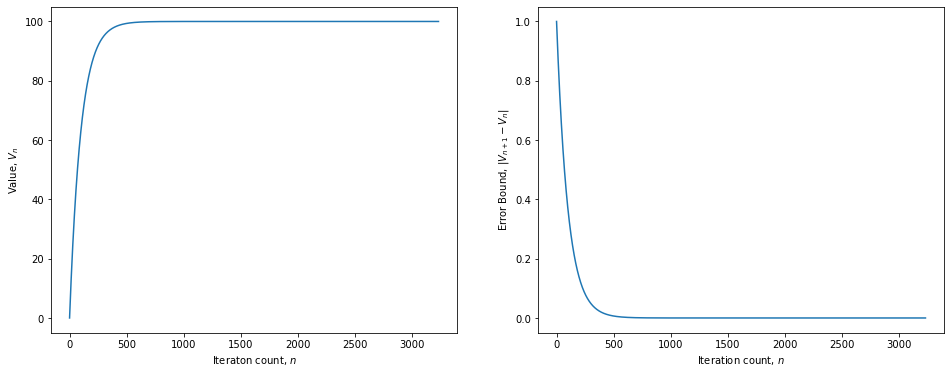

In [14]:
# Create model instance and solve for V using value function iterations (VFI)
model = asset_pricing(beta=0.99) # Create istance of asset_pricing model object
V = model.solve(maxiter=10000, tol=1e-14)

# plot Vn and error bound
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.plot(V,linewidth=1.5)
ax1.set_ylabel("Value, $V_n$"); ax1.set_xlabel("Iteraton count, $n$")
ax2.plot(np.abs(V[1:]-V[0:-1]),linewidth=1.5)
ax2.set_ylabel("Error Bound, $|V_{n+1}-V_{n}$|"); ax2.set_xlabel("Iteration count, $n$")
plt.show()

### Value function iterations are slow when $\beta$ is close to 1
<div align="center">
    <img src="img/asset_iter_beta.png" style="width:1000px;">
</div>


### Properties of VFI
- VFI is easy to program, fast to compute and guaranteed to converge. 
- By the contaction mapping property VFI **converge linearly** 

$$
||\Gamma(W)-\Gamma(V)||\le \beta ||W - V|| \quad \Rightarrow  \quad
||V_{n+1}-V||\le \beta ||V_{n} - V||
$$

- That is, the approximation error at iteration $n+1$ is a linear function of the approximation error at iteration $n$
- When $\beta$ is very close to $1$ $\Rightarrow$ rate of convergence of VFI is slow, $\Rightarrow$ VFI may require thousands of iterations in order to reduce the error from, say $0.01$,to an acceptable value in the range $1e-6$ or smaller. 
- Later in this course we will introduce methods that converges faster (Newton-Kantorowich iterations or Policy iterations)



### Some lessons from this lecture
1. Markov Decisions Processes (MDP) can be expressed recursively by the Bellman equation 
1. Finite horizon models
    - Solution is indexed by time
    - Can be solved by backward induction
    - (VFI staring in the last period $T$ and moving back to period t=0).   
1. In infinite horizon problems
    - The value function and decision rules are are stationary. 
    - Solution is found as fixed point on Bellman Operator. 
    - Solution is unique and VFI is guaranteed to converge if Bellman operator is a contraction. 
    - VFI slows down when $\beta$ is close to 1

### References and further learning resources

- 📖 Adda and Russell Cooper “Dynamic Economics. Quantitative Methods and Applications.” *Chapters: 2, 3.3*  
- QuantEcon: Quantitative Economics with Python [https://python.quantecon.org/intro.html](https://python.quantecon.org/intro.html)  
- QuantEcon: Advanced Quantitative Economics with Python [https://python-advanced.quantecon.org/intro.html](https://python-advanced.quantecon.org/intro.html)